In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./logs/Cache_simulator_statistic.csv', delimiter=';')

data.head()

,Page_size,Levels,L1_size,L1_sets,L2_size,L2_sets,L3_size,L3_sets,DDR_banks,DDR_row_size,IP,Trace_AVG,Prog_AVG
0,64,3,16,1,512,4,2048,8,16,2,1,1.005869,0.308251
1,64,3,16,1,512,4,2048,8,16,2,1,1.005594,0.318677
2,64,3,16,1,512,4,2048,8,16,2,1,1.010594,0.283003
3,64,3,16,1,512,4,2048,8,16,2,1,1.213905,0.287812
4,64,3,16,2,512,4,2048,8,16,2,1,1.159351,0.292220


/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


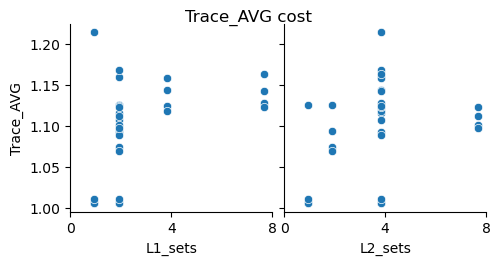

In [54]:
columns = data.columns

y1 = columns[-2]
y2 = columns[-1]

pairplot_columns = columns[:-2]
filtered_columns = [col for col in pairplot_columns if data[col].nunique() > 1]

def create_pairplots(data, pairplot_columns, y_var, group_size=5):
    n = len(pairplot_columns)
    for i in range(0, n, group_size):
        current_columns = pairplot_columns[i:i + group_size]
        pairplot = sns.pairplot(data=data, y_vars=[y_var], x_vars=current_columns)
        
        for ax in pairplot.axes.flatten():
            if ax.get_xlim()[1] > 0:
                xticks = np.linspace(0, ax.get_xlim()[1], 3)
                ax.set_xticks(xticks)
                ax.set_xticklabels([f'{tick:.0f}' for tick in xticks])
        
        plt.suptitle(f'{y_var} cost', y=1.02)
        plt.show()
        
create_pairplots(data, filtered_columns, y1)

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


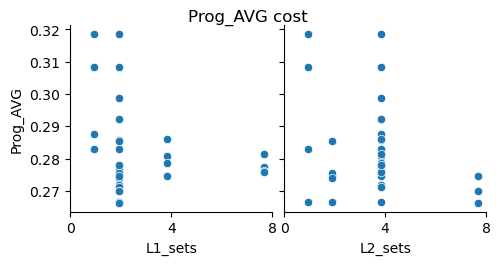

In [55]:
create_pairplots(data, filtered_columns, y2)